#                                                         DATABASE 'Terapia Intensiva'

## Introduzione

Questa relazione descrive il lavoro svolto nell'ambito di un'attività di esercitazione relativa alla realizzazione di un database nel contesto sanitario. L'obiettivo principale era sviluppare un sistema per la gestione dei segni vitali raccolti al letto del paziente nel reparto di Terapia Intensiva.

Nel reparto di Terapia Intensiva, i segni vitali vengono registrati automaticamente ad intervalli di tempo regolare da un sistema di dispositivi presenti al letto del paziente. I parametri che vengono registrati includono la pressione (sistolica e diastolica), la temperatura, il polso, la frequenza respiratoria e l'elettroencefalogramma (EEG).

I medici del reparto necessitano di un sistema che consenta loro di visualizzare l'andamento dei segni vitali dei pazienti nel corso della giornata al fine di monitorarne lo stato di salute e prendere decisioni cliniche informate.

Nel contesto di questa esercitazione sono stati affrontati i seguenti compiti:

1. Definizione del modello concettuale (diagramma E-R) e logico del database necessario per la gestione dei segni vitali nel reparto di Terapia Intensiva.
2. Popolamento del database con i valori di un giorno di circa 5 pazienti, utilizzando valori esemplificativi. Per l'EEG, sono state utilizzate tracce open source.
3. Scrittura di query SQL per ottenere le seguenti informazioni:
   - La media della temperatura, del polso e della frequenza respiratoria dei pazienti nel corso della giornata.
   - Il minimo e il massimo della pressione registrata nel corso della giornata per ciascun paziente.
   - Individuazione dei pazienti che hanno avuto picchi di temperatura (T>39.5 gradi) e di pressione (pSistolica > 175 mmHg).
4. Sviluppo di un programma in Python che, collegandosi al database, consenta a un medico del reparto di visualizzare l'andamento giornaliero dei parametri di pressione, temperatura, polso e frequenza respiratoria di un paziente ricoverato, nonché la traccia EEG di un paziente rilevata in una certa fascia oraria.

La relazione include la descrizione dettagliata delle modalità di svolgimento dell'esercizio, il modello del database, le query SQL utilizzate, i risultati ottenuti sotto forma di tabelle, la descrizione dell'architettura del programma Python e degli esempi dei grafici ottenuti.

Inoltre, sono forniti anche il database popolato con i dati di esempio e il programma Python sviluppato per la visualizzazione dei segni vitali.

Il presente lavoro si propone di fornire una soluzione completa e funzionale per la gestione dei segni vitali nel reparto di Terapia Intensiva, offrendo ai medici gli strumenti necessari per monitorare l'andamento dei parametri vitali dei pazienti e supportare la presa di decisioni cliniche basate su dati accurati e affidabili.

## Diagramma E-R

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\diagramma_ER.jpg)

## Modello Relazionale

**Esami Clinici** ( $\underline{Orario}$, Pressione arteriosa, Pressione diastolica, Pressione sistolica, Temperatura, Polso,  Frequenza Respiratoria, $\underline{Paziente}$, $\underline{Data}$ )

**Pazienti** (DOB, $\underline{CodFisc}$, Nome, Cognome, Sesso, E-mail, Indirizzo, N°tel, Ospedalizzazione, Codice)

**Medici** ($\underline{ID}$, Nome, Cognome, Specializzazione, Cell, Reparto)

**Reparti** (Nome, PostiLetto, $\underline{ID}$)

**Ricoveri** ($\underline{Paziente}$, Stato, ID_R, Reparto)

**Monitoraggi** ($\underline{CodFiscPaz}$, $\underline{Medico}$, $\underline{Orario_Es}$, $\underline{Data}$)

**Cure** ($\underline{Paziente}$, $\underline{Medico}$)

## SQLalchemy

SQLAlchemy è una libreria Python che fornisce un'astrazione potente e flessibile per lavorare con database relazionali. È progettata per semplificare la comunicazione e la gestione dei dati tra un'applicazione Python e un database.

Con SQLAlchemy, è possibile creare, modificare, interrogare e gestire database utilizzando un approccio orientato agli oggetti, in cui le tabelle del database vengono rappresentate come classi Python e le righe delle tabelle come istanze di queste classi.

Per prima cosa installiamo i package necessari all'inserimento dei dati

In [16]:
!pip install sqlalchemy
!pip install mysql-python

You should consider upgrading via the 'C:\Users\Utente\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached MySQL-python-1.2.5.zip (108 kB)
  Running setup.py clean for mysql-python
Failed to build mysql-python
    Running setup.py install for mysql-python: started
    Running setup.py install for mysql-python: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Utente\AppData\Local\Programs\Python\Python310\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Utente\\AppData\\Local\\Temp\\pip-install-sw8ptt09\\mysql-python_e4b31456840b406e9fff0c5a710ab0eb\\setup.py'"'"'; __file__='"'"'C:\\Users\\Utente\\AppData\\Local\\Temp\\pip-install-sw8ptt09\\mysql-python_e4b31456840b406e9fff0c5a710ab0eb\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Utente\AppData\Local\Temp\pip-wheel-_ljigdbo'
       cwd: C:\Users\Utente\AppData\Local\Temp\pip-install-sw8ptt09\mysql-python_e4b31456840b406e9fff0c5a710ab0eb\
  Complete output (28 lines):
  C:\Users\Utente\AppData\Local\Programs\Python\Python310\lib\si

Installati i package "aggiuntivi" andiamo ad importare le librerie necessarie

In [9]:
import pandas as pd

import sqlalchemy as sql
from sqlalchemy import create_engine
from sqlalchemy import text

Dal momento che vogliamo creare il database di prova da usare stabiliremo prima una connessione all'host per generare il database tramite query e poi stabiliremo una nuova connessione al database

In [17]:
drivername = "mysqlconnector"
username = "root"
password = "ciao"
server = "127.0.0.1"
port = "3306"

dbname = "ospedale"

In [18]:
first_conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}"
conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/{dbname}"

## Dataset: VitalDB

### Introduzione al dataset

Il dataset VitalDB disponibile al link (https://vitaldb.net/dataset/?query=overview) è una collezione di dati medici in tempo reale provenienti da pazienti ricoverati in terapia intensiva. Il dataset contiene una vasta gamma di informazioni cliniche, tra cui parametri vitali, segnali fisiologici, esami di laboratorio e altre misurazioni.

Le principali caratteristiche e informazioni sul dataset VitalDB sono le seguenti:

I dati del dataset sono raccolti da pazienti ricoverati in terapia intensiva in diversi ospedali e strutture sanitarie.
Il dataset comprende una serie di parametri vitali, come pressione arteriosa, temperatura corporea, frequenza cardiaca, frequenza respiratoria e altri indicatori importanti per il monitoraggio dello stato clinico dei pazienti.
Oltre ai parametri vitali, il dataset include anche segnali fisiologici registrati, come l'elettrocardiogramma (ECG) e l'elettroencefalogramma (EEG). Questi segnali forniscono informazioni dettagliate sulle attività cardiache e cerebrali dei pazienti.

I dati del dataset sono registrati nel tempo, consentendo l'analisi dell'andamento e delle variazioni dei parametri vitali e dei segnali fisiologici nel corso del tempo. Ciò può essere utile per identificare pattern, tendenze o eventi critici che possono influenzare la condizione del paziente. Il dataset VitalDB è disponibile in formato tabellare o in altri formati standard come CSV o SQL. Ciò facilita l'importazione e l'analisi dei dati utilizzando strumenti di analisi come Python e librerie come Pandas. Il dataset VitalDB, inoltre, è ampiamente utilizzato per scopi di ricerca e sviluppo nell'ambito della medicina, dell'informatica sanitaria e dell'apprendimento automatico. I dati possono essere utilizzati per sviluppare algoritmi di monitoraggio, modelli di previsione e sistemi di supporto alle decisioni cliniche.
In generale, il dataset VitalDB rappresenta una preziosa risorsa per la ricerca e l'analisi nell'ambito della medicina e dell'informatica sanitaria. L'accesso a un'ampia gamma di dati clinici in tempo reale può contribuire alla comprensione delle dinamiche dei parametri vitali, alla valutazione dell'efficacia dei trattamenti e alla progettazione di soluzioni innovative per il monitoraggio e la gestione dei pazienti.

Il dataset contiene i dati raccolti da pazienti sottoposti a interventi chirurgici non cardiaci (ad esempio chirurgia generale, toracica, urologica e ginecologica) presso 10 delle 31 sale operatorie dell'Ospedale Universitario Nazionale di Seoul, situato a Seoul, nella Repubblica di Corea. 
I dati sono stati registrati utilizzando il software Vital Recorder versione 1.7.4 e sono disponibili in formato di file "vital". Ogni file di caso contiene dati ad alta risoluzione con una frequenza di campionamento di 500 Hz per i dati a forma d'onda e da 1 a 7 secondi per i dati numerici. In media, ogni caso contiene circa 2,8 milioni di punti dati.
Il dataset comprende un totale di 557.622 tracce di dati provenienti da 6.388 casi diversi. La quantità di tracce di dati per caso varia da un minimo di 16 a un massimo di 136, con una media di 87 tracce per caso. Tutte le tracce di dati presenti nei file "vital" sono state estratte, convertite nel formato CSV e compresse utilizzando il formato gzip.


### Utilizzo del dataset

#### Caricamento della libreria e dei dati


Per utilizzare il set di dati aperti VitalDB, è necessaria la libreria pandas.
Per prima cosa, dobbiamo caricare 2 endpoint del dataset aperto VitalDB.

In [23]:
import pandas as pd

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list

#### Utilizzo dei dati clinici

openpyxl è una libreria Python per leggere/scrivere i file xlsx/xlsm/xltx/xltm di Excel.

In [24]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Utente\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Si controllano visivamente i casi e le variabili del dataset VitalDB.

In [25]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [26]:
df_cases.to_excel("df_cases.xlsx") 

In [27]:
filepath = "df_cases.xlsx"

In [28]:
data = pd.read_excel(filepath, header=0)
data

,Unnamed: 0,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,...,0,120,0.0,100,70,0,10,0,0,0
1,1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,...,0,150,0.0,0,100,0,20,0,0,0
2,2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,...,0,0,0.0,0,50,0,0,0,0,0
3,3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,...,0,80,0.0,100,100,0,50,0,0,0
4,4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,...,0,150,0.0,0,90,0,20,0,0,0
6384,6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,...,0,100,0.0,0,100,0,25,30,0,300
6385,6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,...,0,70,0.0,0,130,0,10,0,0,0
6386,6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,...,0,120,0.0,0,50,0,0,0,0,0


#### Utilizzo dei dati dell'elenco tracce

Si controllano visivamente quali sono le tracce offerte dal dataset

In [29]:
df_trks

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
...,...,...,...
486444,6388,Solar8000/VENT_PIP,2d63adbc7e2653f14348e219816673cde3358cf6
486445,6388,Solar8000/VENT_PPLAT,6f6604255858ddc8f6a01b9f4774b0d43105f6da
486446,6388,Solar8000/VENT_RR,f34f3fae7fd963355c1c7060e1e876d20fa87536
486447,6388,Solar8000/VENT_SET_TV,4a4a55b8aebf9c76a4a76f62a7c1ec6fcb80e618


In [30]:
df_trks.to_excel("df_trks.xlsx") 

In [31]:
filepath = "df_trks.xlsx"

In [32]:
data = pd.read_excel(filepath, header=0)
data

,Unnamed: 0,caseid,tname,tid
0,0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
...,...,...,...,...
486444,486444,6388,Solar8000/VENT_PIP,2d63adbc7e2653f14348e219816673cde3358cf6
486445,486445,6388,Solar8000/VENT_PPLAT,6f6604255858ddc8f6a01b9f4774b0d43105f6da
486446,486446,6388,Solar8000/VENT_RR,f34f3fae7fd963355c1c7060e1e876d20fa87536
486447,486447,6388,Solar8000/VENT_SET_TV,4a4a55b8aebf9c76a4a76f62a7c1ec6fcb80e618


#### Caricare la traccia desiderata dall'ID del caso

Il passo successivo consiste nel caricare i dati della traccia effettiva con caseid e nome della traccia. L'uso della libreria vitaldb è il modo più semplice.

In [33]:
!pip install vitaldb

You should consider upgrading via the 'C:\Users\Utente\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Per ciascun paziente è possibile ricavare i parametri vitali utilizzando vitaldb.
Nella tabella seguente si sintetizzano i traks presi dal dataset ed i parametri vitali corrispondenti.

In [1]:
!pip install nbconvert[webpdf]

You should consider upgrading via the 'C:\Users\Utente\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


\begin{tabular}{|c|c|c|}
\hline
\textbf{Parameter} & \textbf{Description}                  & \textbf{Unit} \\ \hline
SNUADC/ART         & Arterial pressure wave                & mmHg          \\ \hline
Solar8000/ART\_SBP & Systolic arterial pressure            & mmHg          \\ \hline
Solar8000/ART\_DBP & Diastolic arterial pressure           & mmHg          \\ \hline
Solar8000/BT       & Body temperature                      & ℃             \\ \hline
Solar8000/HR       & Heart rate                            & /min          \\ \hline
Solar8000/RR\_CO2  & Respiratory rate based on capnography & /min          \\ \hline
BIS/EEG1\_WAV      & EEG wave from channel 1               & uV            \\ \hline
\end{tabular}


In [35]:
import vitaldb
vals = vitaldb.load_case(caseid=1, track_names=['SNUADC/ART','Solar8000/ART_SBP', 'Solar8000/ART_DBP', 'Solar8000/BT', 'Solar8000/HR', 'Solar8000/RR_CO2', 'BIS/EEG1_WAV'],interval=1/128)

f_sampling = 128
N_samples = len(vals)
time = round(N_samples*(1/f_sampling),2) #secondi
minuts = round(time/60)
hours = round(minuts/60,2)

print(f_sampling, 'campioni/s')
print(N_samples, 'campioni')
print(time, 's')
print(hours, 'hours')

durata = time
vals = vals[::128]
print(len(vals), 'campioni presi ogni secondo')


128 campioni/s
1477354 campioni
11541.83 s
3.2 hours
11542 campioni presi ogni secondo


In [36]:
vals

array([[        nan,         nan,         nan, ...,         nan,
                nan, 22.85000038],
       [-7.82222986,         nan,         nan, ...,         nan,
                nan, 22.89999962],
       [-8.80967999,         nan,         nan, ...,         nan,
                nan, 22.70000076],
       ...,
       [18.83909988,         nan,         nan, ...,         nan,
                nan, 10.80000019],
       [16.86420059,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 5.01470995,         nan,         nan, ...,         nan,
                nan,         nan]])

In [37]:
vals.shape

(11542, 7)

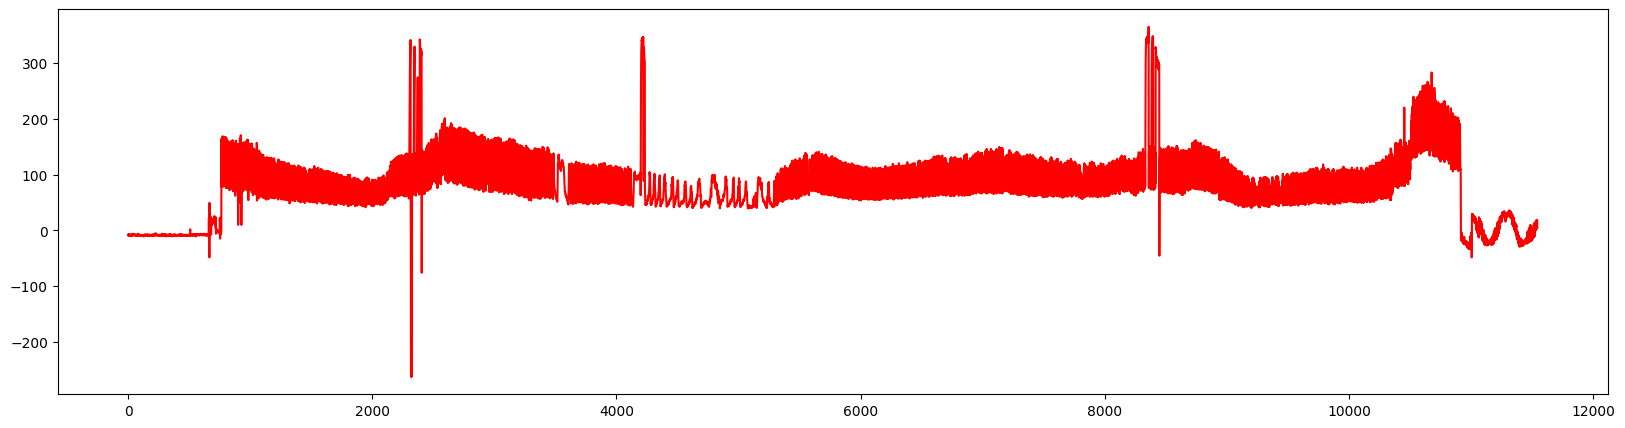

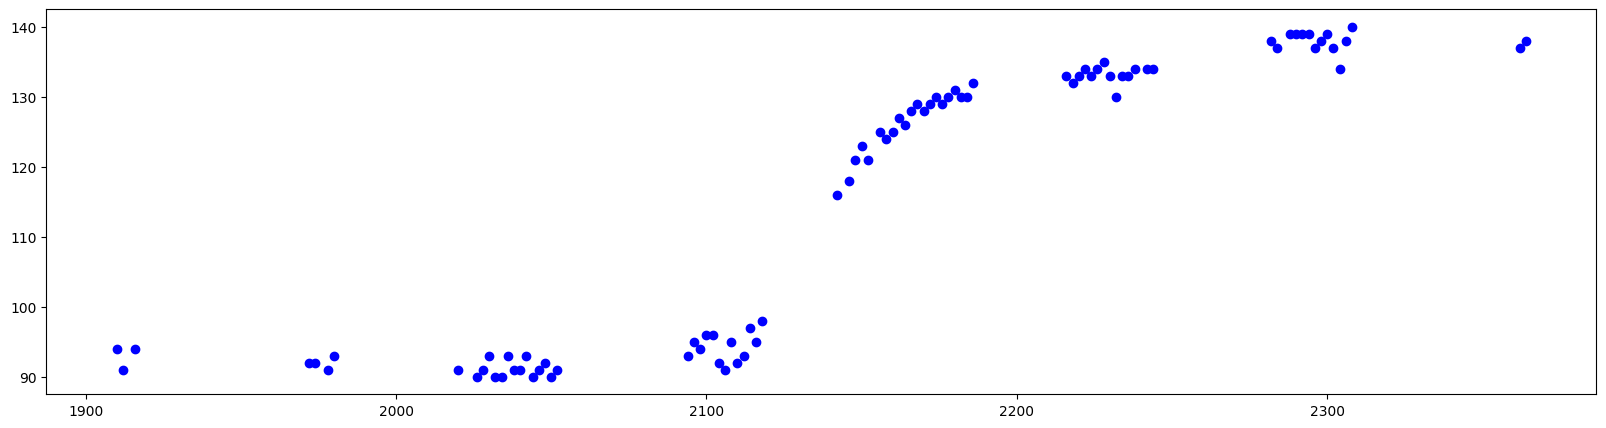

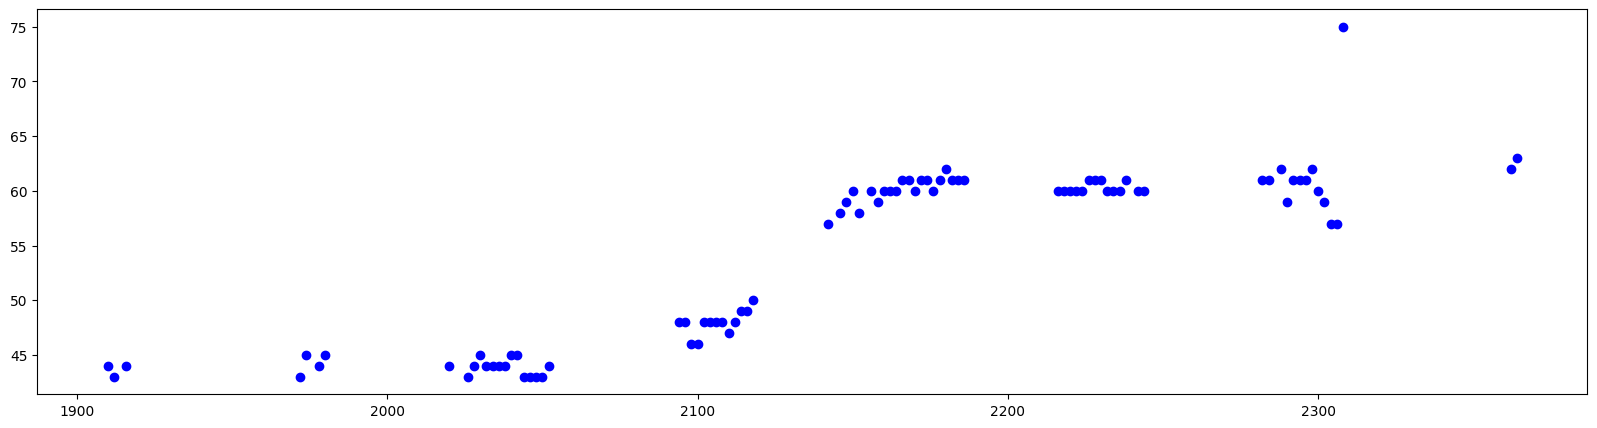

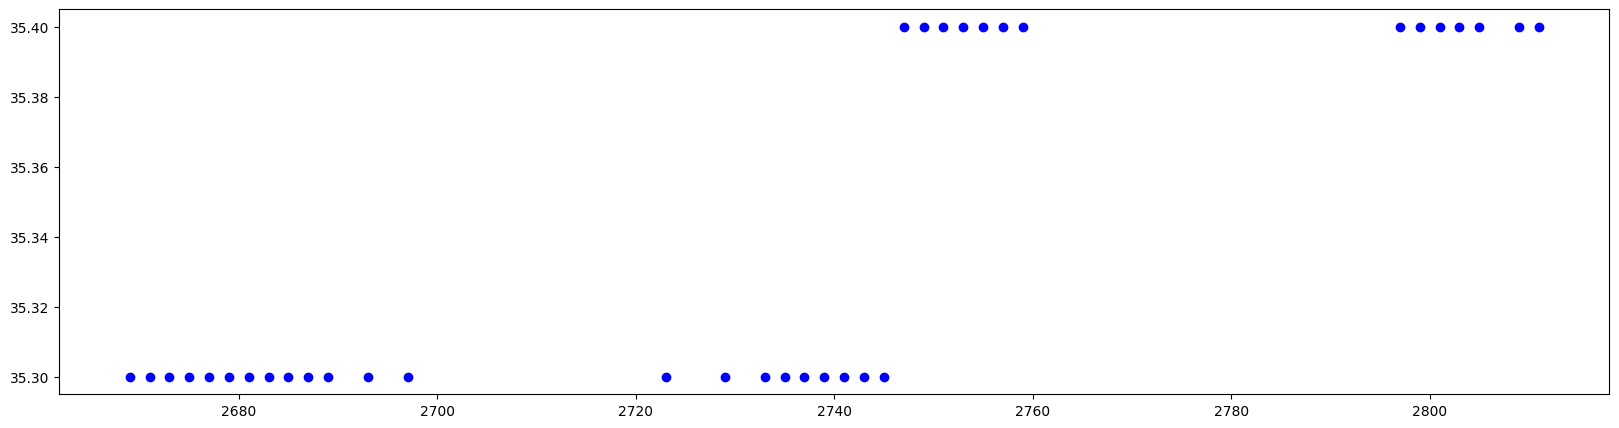

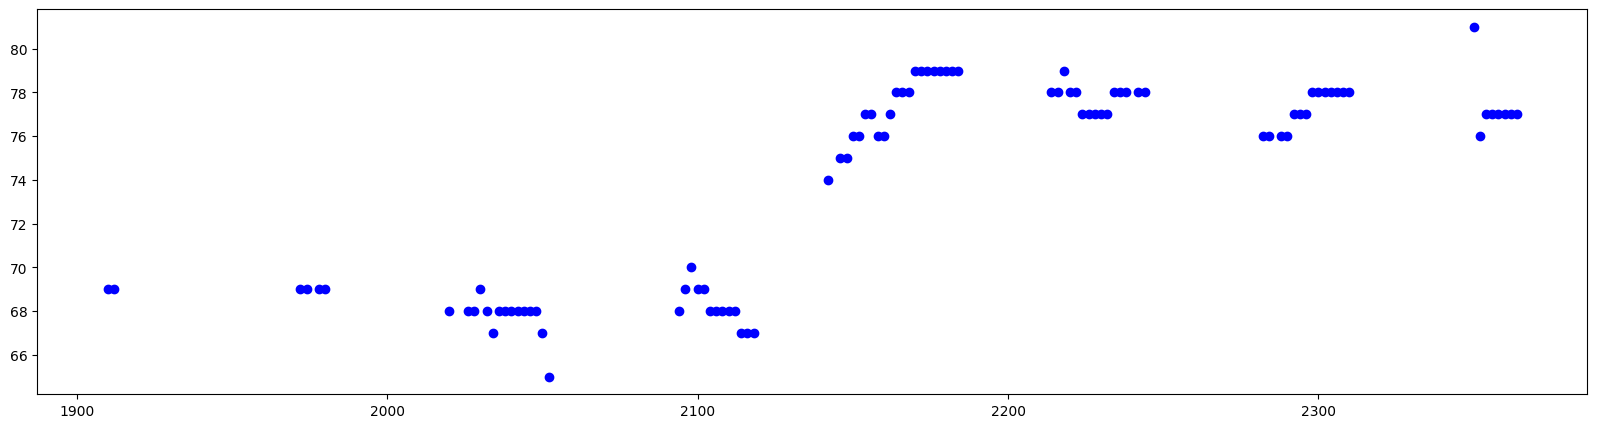

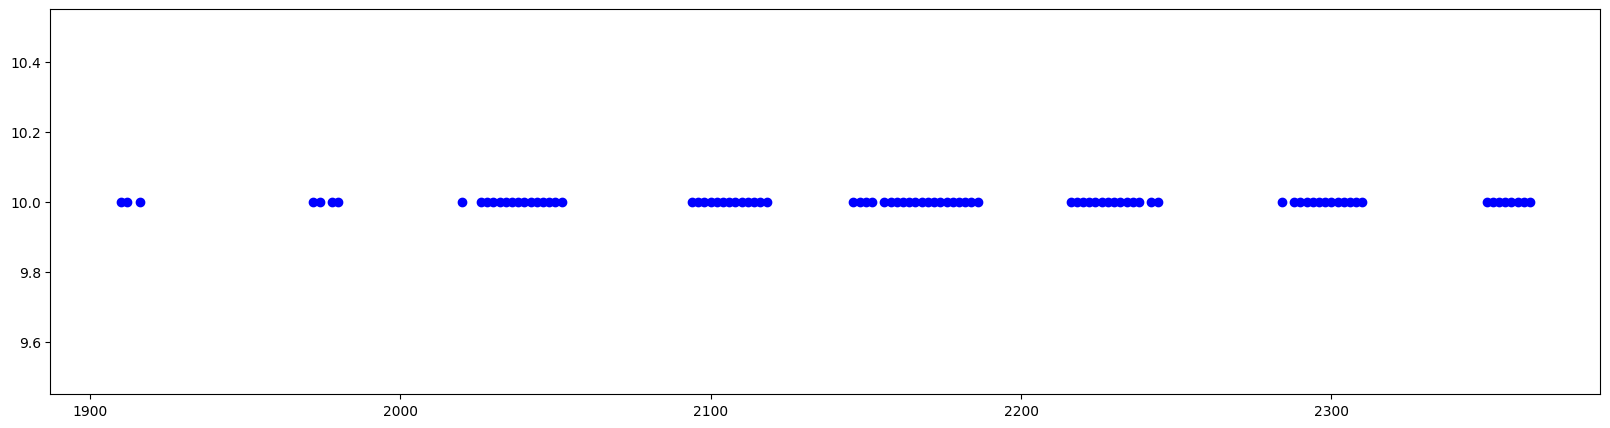

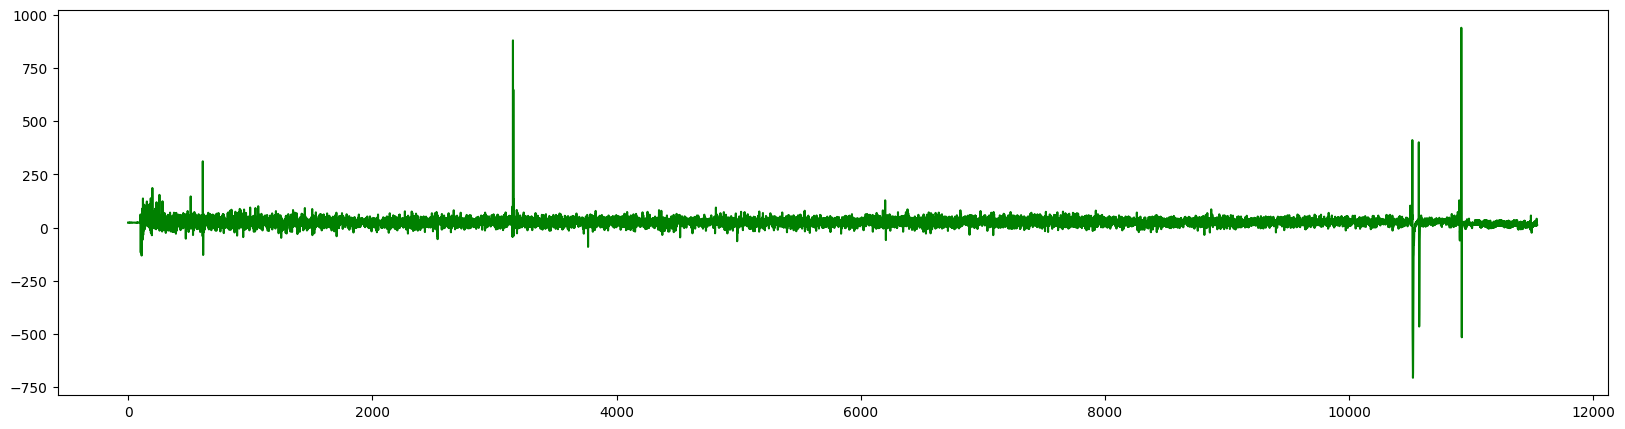

In [38]:

import matplotlib.pyplot as plt

# 'SNUADC/ART' (Arterial pressure wave) [mmHg]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 0], color='r')
plt.show()

#'Solar8000/ART_SBP' (Systolic arterial pressure) [mmHg]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 1], 'bo')
plt.show()

#'Solar8000/ART_DBP' (Diastolic arterial pressure) [mmHg]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 2], 'bo')
plt.show()

# 'Solar8000/BT' (Body temperature) [°C]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 3], 'bo')
plt.show()

# 'Solar8000/HR' (Heart rate) [/min]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 4], 'bo')
plt.show()

# 'Solar8000/RR' (Respiratory rate based on capnography) [/min]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 5], 'bo')
plt.show()

# 'BIS/EEG1_WAV' (EEG wave from channel 1) [uV]
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 6], 'g-')
plt.show()

In [39]:
from datetime import datetime, timedelta

def vettore_orari(inizio, durata, intervallo):
    orari = []
    tempo_corrente = datetime.strptime(inizio, "%H:%M:%S")
    durata = timedelta(seconds=durata)
    intervallo = timedelta(seconds=intervallo)
    orario_finale = tempo_corrente + durata  # Calcolo dell'orario finale

    while tempo_corrente <= orario_finale:
        orari.append(tempo_corrente.strftime("%H:%M:%S"))
        tempo_corrente += intervallo

    return orari

inizio = "10:00:00"
durata = time  # Durata di 3600 secondi (1 ora)
intervallo = 1  # Intervallo di 900 secondi (15 minuti)

risultato = vettore_orari(inizio, durata, intervallo)
print(risultato)  # Output: ['10:00:00', '10:15:00', '10:30:00', '10:45:00']


['10:00:00', '10:00:01', '10:00:02', '10:00:03', '10:00:04', '10:00:05', '10:00:06', '10:00:07', '10:00:08', '10:00:09', '10:00:10', '10:00:11', '10:00:12', '10:00:13', '10:00:14', '10:00:15', '10:00:16', '10:00:17', '10:00:18', '10:00:19', '10:00:20', '10:00:21', '10:00:22', '10:00:23', '10:00:24', '10:00:25', '10:00:26', '10:00:27', '10:00:28', '10:00:29', '10:00:30', '10:00:31', '10:00:32', '10:00:33', '10:00:34', '10:00:35', '10:00:36', '10:00:37', '10:00:38', '10:00:39', '10:00:40', '10:00:41', '10:00:42', '10:00:43', '10:00:44', '10:00:45', '10:00:46', '10:00:47', '10:00:48', '10:00:49', '10:00:50', '10:00:51', '10:00:52', '10:00:53', '10:00:54', '10:00:55', '10:00:56', '10:00:57', '10:00:58', '10:00:59', '10:01:00', '10:01:01', '10:01:02', '10:01:03', '10:01:04', '10:01:05', '10:01:06', '10:01:07', '10:01:08', '10:01:09', '10:01:10', '10:01:11', '10:01:12', '10:01:13', '10:01:14', '10:01:15', '10:01:16', '10:01:17', '10:01:18', '10:01:19', '10:01:20', '10:01:21', '10:01:22', '10

In [40]:
len(risultato)

11542

In [41]:
import numpy as np
risultato = np.array(risultato)

In [42]:
risultato.shape

(11542,)

In [43]:
risultato = risultato.reshape(-1, 1)
risultato.shape

(11542, 1)

In [44]:
len(vals)

11542

In [45]:
vals.shape

(11542, 7)

In [46]:
import numpy as np

vals = np.hstack((risultato, vals))

In [47]:
vals.shape

(11542, 8)

In [49]:
vals =pd.DataFrame(vals,
            columns=['Orario', 'Arterial_pressure_wave_[mmHg]', 'Systolic arterial pressure [mmHg]', 'Diastolic arterial pressure [mmHg]', 'Body temperature [°C]', 'Heart rate [/min]', 'Respiratory rate based on capnography [/min]', 'EEG wave from channel 1 [uV]'])

In [50]:
vals.to_excel("1.xlsx")


In [52]:
filepath = "1.xlsx"

In [53]:
data = pd.read_excel(filepath, header=0)
data

,Unnamed: 0,Orario,Arterial_pressure_wave_[mmHg],Systolic arterial pressure [mmHg],Diastolic arterial pressure [mmHg],Body temperature [°C],Heart rate [/min],Respiratory rate based on capnography [/min],EEG wave from channel 1 [uV]
0,0,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.850000
1,1,10:00:01,-7.822230,NaN,NaN,NaN,NaN,NaN,22.900000
2,2,10:00:02,-8.809680,NaN,NaN,NaN,NaN,NaN,22.700001
3,3,10:00:03,-6.834770,NaN,NaN,NaN,NaN,NaN,22.600000
4,4,10:00:04,-8.809680,NaN,NaN,NaN,NaN,NaN,22.700001
...,...,...,...,...,...,...,...,...,...
11537,11537,13:12:17,12.914400,NaN,NaN,NaN,NaN,NaN,11.500000
11538,11538,13:12:18,11.926900,NaN,NaN,NaN,NaN,NaN,9.750000
11539,11539,13:12:19,18.839100,NaN,NaN,NaN,NaN,NaN,10.800000
11540,11540,13:12:20,16.864201,NaN,NaN,NaN,NaN,NaN,NaN


Fatto per il primo paziente (caseid 1), la stessa procedura viene eseguita per gli 4 altri pazienti (caseid 20, 50, 60, 70), in modo tale da avere 5 file in formato xlsx, ciascuno contenente i parametri vitali del paziente corrispondente.

In [7]:
file_list = ['1.xlsx', '20.xlsx', '50.xlsx', '60.xlsx', '70.xlsx']

In [207]:
data_frames = []  # Creazione di una lista per contenere i DataFrame di ogni file

for file in file_list:
    df = pd.read_excel(file)  # Leggi il file Excel come DataFrame
    data_frames.append(df)  # Aggiungi il DataFrame alla lista


'\ndata_frames = []  # Creazione di una lista per contenere i DataFrame di ogni file\n\nfor file in file_list:\n    df = pd.read_excel(file)  # Leggi il file Excel come DataFrame\n    data_frames.append(df)  # Aggiungi il DataFrame alla lista\n'

In [18]:
merged_df = pd.concat(data_frames)

In [206]:
merged_df.to_excel('ESAMI CLINICI.xlsx', index=False)

In [106]:
filepath = "ESAMI CLINICI.xlsx"

In [107]:
data = pd.read_excel(filepath, header=0)
data

,Orario,Arterial_pressure_wave_[mmHg],Systolic_arterial_pressure_[mmHg],Diastolic_arterial_pressure_[mmHg],Body_ temperature_[°C],Heart_rate_[/min],Respiratory_rate_based_on_capnography_[/min],EEG_wave_from_channel_1_[uV],Paziente,Data
0,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.850000,RSSMRA94D15H789X,2023-06-19
1,10:00:01,-7.822230,NaN,NaN,NaN,NaN,NaN,22.900000,RSSMRA94D15H789X,2023-06-19
2,10:00:02,-8.809680,NaN,NaN,NaN,NaN,NaN,22.700001,RSSMRA94D15H789X,2023-06-19
3,10:00:03,-6.834770,NaN,NaN,NaN,NaN,NaN,22.600000,RSSMRA94D15H789X,2023-06-19
4,10:00:04,-8.809680,NaN,NaN,NaN,NaN,NaN,22.700001,RSSMRA94D15H789X,2023-06-19
...,...,...,...,...,...,...,...,...,...,...
9184,10:17:43,97.835701,232.0,73.0,39.7,NaN,NaN,120.400002,QWERTY78N45M623R,2023-06-19
9185,10:17:44,200.531006,NaN,NaN,NaN,NaN,NaN,76.550003,QWERTY78N45M623R,2023-06-19
9186,10:17:45,21.801500,203.0,64.0,NaN,NaN,NaN,-132.000000,QWERTY78N45M623R,2023-06-19
9187,10:17:46,20.813999,NaN,NaN,NaN,NaN,NaN,-1339.099976,QWERTY78N45M623R,2023-06-19


In [108]:
data = data.round(2)
data

,Orario,Arterial_pressure_wave_[mmHg],Systolic_arterial_pressure_[mmHg],Diastolic_arterial_pressure_[mmHg],Body_ temperature_[°C],Heart_rate_[/min],Respiratory_rate_based_on_capnography_[/min],EEG_wave_from_channel_1_[uV],Paziente,Data
0,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.85,RSSMRA94D15H789X,2023-06-19
1,10:00:01,-7.82,NaN,NaN,NaN,NaN,NaN,22.90,RSSMRA94D15H789X,2023-06-19
2,10:00:02,-8.81,NaN,NaN,NaN,NaN,NaN,22.70,RSSMRA94D15H789X,2023-06-19
3,10:00:03,-6.83,NaN,NaN,NaN,NaN,NaN,22.60,RSSMRA94D15H789X,2023-06-19
4,10:00:04,-8.81,NaN,NaN,NaN,NaN,NaN,22.70,RSSMRA94D15H789X,2023-06-19
...,...,...,...,...,...,...,...,...,...,...
9184,10:17:43,97.84,232.0,73.0,39.7,NaN,NaN,120.40,QWERTY78N45M623R,2023-06-19
9185,10:17:44,200.53,NaN,NaN,NaN,NaN,NaN,76.55,QWERTY78N45M623R,2023-06-19
9186,10:17:45,21.80,203.0,64.0,NaN,NaN,NaN,-132.00,QWERTY78N45M623R,2023-06-19
9187,10:17:46,20.81,NaN,NaN,NaN,NaN,NaN,-1339.10,QWERTY78N45M623R,2023-06-19


In [109]:
data.dtypes

Orario                                                  object
Arterial_pressure_wave_[mmHg]                          float64
Systolic_arterial_pressure_[mmHg]                      float64
Diastolic_arterial_pressure_[mmHg]                     float64
Body_ temperature_[°C]                                 float64
Heart_rate_[/min]                                      float64
Respiratory_rate_based_on_capnography_[/min]           float64
EEG_wave_from_channel_1_[uV]                           float64
Paziente                                                object
Data                                            datetime64[ns]
dtype: object

## Creazione del database

In [110]:
first_conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}"

In [111]:
engine = create_engine(first_conn_eng)

with engine.connect() as conn:
    conn.execute(text("DROP DATABASE ospedale;"))
    conn.commit()

In [112]:
engine = create_engine(first_conn_eng)

with engine.connect() as conn:
    conn.execute(text("CREATE DATABASE ospedale;"))
    conn.commit()

In [113]:
engine = create_engine(first_conn_eng)

with engine.connect() as conn:
    conn.execute(text("USE ospedale;"))
    conn.commit()

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\DBs.png)

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\DB_tables.png)


In [114]:
conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("esami_clinici", conn, index=False)
    conn.commit()

In [115]:
query = text("SELECT * FROM esami_clinici")

with engine.connect() as conn:
    
    res = pd.read_sql_query(query, conn)

In [116]:
res

,Orario,Arterial_pressure_wave_[mmHg],Systolic_arterial_pressure_[mmHg],Diastolic_arterial_pressure_[mmHg],Body_ temperature_[°C],Heart_rate_[/min],Respiratory_rate_based_on_capnography_[/min],EEG_wave_from_channel_1_[uV],Paziente,Data
0,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.85,RSSMRA94D15H789X,2023-06-19
1,10:00:01,-7.82,NaN,NaN,NaN,NaN,NaN,22.90,RSSMRA94D15H789X,2023-06-19
2,10:00:02,-8.81,NaN,NaN,NaN,NaN,NaN,22.70,RSSMRA94D15H789X,2023-06-19
3,10:00:03,-6.83,NaN,NaN,NaN,NaN,NaN,22.60,RSSMRA94D15H789X,2023-06-19
4,10:00:04,-8.81,NaN,NaN,NaN,NaN,NaN,22.70,RSSMRA94D15H789X,2023-06-19
...,...,...,...,...,...,...,...,...,...,...
9184,10:17:43,97.84,232.0,73.0,39.7,NaN,NaN,120.40,QWERTY78N45M623R,2023-06-19
9185,10:17:44,200.53,NaN,NaN,NaN,NaN,NaN,76.55,QWERTY78N45M623R,2023-06-19
9186,10:17:45,21.80,203.0,64.0,NaN,NaN,NaN,-132.00,QWERTY78N45M623R,2023-06-19
9187,10:17:46,20.81,NaN,NaN,NaN,NaN,NaN,-1339.10,QWERTY78N45M623R,2023-06-19


In [117]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici MODIFY COLUMN Orario time(0) NOT NULL;"))
    conn.commit()

In [118]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici MODIFY COLUMN paziente char(20) NOT NULL;"))

In [119]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici MODIFY COLUMN Data datetime NOT NULL;"))

In [120]:
with engine.connect() as conn:
    conn.execute(text("UPDATE esami_clinici SET Orario = TRIM(Orario) WHERE Orario IS NULL;"))
    conn.commit()

In [121]:
with engine.connect() as conn:
    conn.execute(text("UPDATE esami_clinici SET Paziente = TRIM(Paziente) WHERE Paziente IS NOT NULL;"))
    conn.commit()

In [122]:
with engine.connect() as conn:
    conn.execute(text("UPDATE esami_clinici SET Data = TRIM(Data) WHERE Data IS NOT NULL;"))
    conn.commit()

In [123]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici ADD PRIMARY KEY (Orario, Paziente, Data);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM esami_clinici;"), conn)
    

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\esami_clinici.png)


In [124]:
filepath = "PAZIENTI.xlsx"
data = pd.read_excel(filepath, header=0)

conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("pazienti", conn, index=False)
    conn.commit()
    
    res = pd.read_sql_query(text("SELECT * FROM pazienti;"), conn)
    

res.head(5)

,DOB,CodFisc,Nome,Cognome,Sesso,e-mail,Indirizzo,N°tel,Ospedalizzazione,Codice
0,1946-05-12,RSSMRA94D15H789X,Michael,Johnson,M,michael.jhonson@live.com,"123 Main Street, Anytown, NY 12345",(555) 123-4567,2023-05-15,Rosso
1,1948-06-11,PLTNXC82E23Z456Y,Benjamin,Davis,M,ben.davis@live.com,"456 Elm Avenue, Springfield, CA 98765",(987) 654-3210,2023-05-28,Arancio
2,1976-01-25,BVGDFA67M34L123Z,Emily,Thompson,F,emily01.thson@live.com,"789 Oak Drive, Lakeside, TX 54321",(123) 456-7890,2023-06-03,Arancio
3,1968-01-04,KJHRTY91P67G321W,Olivia,Martinez,F,olive.martinez01@live.com,"321 Maple Lane, Mountain View, FL 67890",(789) 012-3456,2023-06-15,Rosso
4,1947-01-01,QWERTY78N45M623R,Ethan,Wilson,M,ethan.whilson@health.com,"987 Pine Street, Riverdale, IL 23456",(234) 567-8901,2023-05-09,Rosso


In [125]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici MODIFY COLUMN Paziente char(20);"))
    conn.commit()
    res = conn.execute(text("DESCRIBE esami_clinici;"))
    
print(res)

In [126]:
data.dtypes

DOB                 datetime64[ns]
CodFisc                     object
Nome                        object
Cognome                     object
Sesso                       object
e-mail                      object
Indirizzo                   object
N°tel                       object
Ospedalizzazione    datetime64[ns]
Codice                      object
dtype: object

In [127]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE pazienti MODIFY COLUMN CodFisc char(20) NOT NULL;"))
    conn.commit()

In [128]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE pazienti ADD PRIMARY KEY (CodFisc);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM pazienti;"), conn)
    

res.head(5)

,DOB,CodFisc,Nome,Cognome,Sesso,e-mail,Indirizzo,N°tel,Ospedalizzazione,Codice
0,1976-01-25,BVGDFA67M34L123Z,Emily,Thompson,F,emily01.thson@live.com,"789 Oak Drive, Lakeside, TX 54321",(123) 456-7890,2023-06-03,Arancio
1,1968-01-04,KJHRTY91P67G321W,Olivia,Martinez,F,olive.martinez01@live.com,"321 Maple Lane, Mountain View, FL 67890",(789) 012-3456,2023-06-15,Rosso
2,1948-06-11,PLTNXC82E23Z456Y,Benjamin,Davis,M,ben.davis@live.com,"456 Elm Avenue, Springfield, CA 98765",(987) 654-3210,2023-05-28,Arancio
3,1947-01-01,QWERTY78N45M623R,Ethan,Wilson,M,ethan.whilson@health.com,"987 Pine Street, Riverdale, IL 23456",(234) 567-8901,2023-05-09,Rosso
4,1946-05-12,RSSMRA94D15H789X,Michael,Johnson,M,michael.jhonson@live.com,"123 Main Street, Anytown, NY 12345",(555) 123-4567,2023-05-15,Rosso


In [129]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici ADD FOREIGN KEY (Paziente) REFERENCES Pazienti(CodFisc);"))
    conn.commit()

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\pazienti.png)

In [130]:
filepath = "REPARTI.xlsx"
data = pd.read_excel(filepath, header=0)

conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("reparti", conn, index=False)
    conn.commit()
    
    res = pd.read_sql_query(text("SELECT * FROM reparti;"), conn)
    

res.head(5)

,Nome,Posti Letto,ID
0,Medicina Interna,30,123
1,Chirurgia Generale,15,789
2,Pediatria,20,456
3,Terapia Intensiva,10,167
4,Cardiologia,25,654


In [131]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE reparti ADD PRIMARY KEY (ID);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM reparti;"), conn)
    

res.head(5)

,Nome,Posti Letto,ID
0,Medicina Interna,30,123
1,Terapia Intensiva,10,167
2,Pediatria,20,456
3,Cardiologia,25,654
4,Chirurgia Generale,15,789


![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\reparti.png)

In [132]:
filepath = "MEDICI.xlsx"
data = pd.read_excel(filepath, header=0)

conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("medici", conn, index=False)
    conn.commit()
    
    res = pd.read_sql_query(text("SELECT * FROM medici;"), conn)
    

res.head(5)

,Unnamed: 0,Nome,Cognome,Specializzazione,ID,Cell,Reparto
0,0,Giovanni,Rossi,Ortopedia,12445,555-123-4567,167
1,1,Laura,Bianchi,Cardiologia,52314,555-987-6543,167


In [133]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE medici ADD PRIMARY KEY (ID);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM medici;"), conn)
    

res.head(5)

,Unnamed: 0,Nome,Cognome,Specializzazione,ID,Cell,Reparto
0,0,Giovanni,Rossi,Ortopedia,12445,555-123-4567,167
1,1,Laura,Bianchi,Cardiologia,52314,555-987-6543,167


In [134]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE medici ADD FOREIGN KEY (reparto) REFERENCES reparti(ID);"))
    conn.commit()

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\medici.png)

In [135]:
filepath = "RICOVERI.xlsx"
data = pd.read_excel(filepath, header=0)

conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("ricoveri", conn, index=False)
    conn.commit()
    
    res = pd.read_sql_query(text("SELECT * FROM ricoveri;"), conn)
    

res.head(5)

,Paziente,Stato,ID_R,Reparto
0,RSSMRA94D15H789X,ON,PTH001R,167
1,PLTNXC82E23Z456Y,OFF,PTH456R,167
2,BVGDFA67M34L123Z,ON,PTH789R,167
3,KJHRTY91P67G321W,ON,PTH456R,167
4,QWERTY78N45M623R,ON,PTH321R,167


In [136]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE ricoveri MODIFY COLUMN Paziente char(20);"))
    conn.commit()
    res = conn.execute(text("DESCRIBE ricoveri;"))
    
print(res)

In [137]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE ricoveri ADD PRIMARY KEY (Paziente);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM ricoveri;"), conn)
    

res.head(5)

,Paziente,Stato,ID_R,Reparto
0,BVGDFA67M34L123Z,ON,PTH789R,167
1,KJHRTY91P67G321W,ON,PTH456R,167
2,PLTNXC82E23Z456Y,OFF,PTH456R,167
3,QWERTY78N45M623R,ON,PTH321R,167
4,RSSMRA94D15H789X,ON,PTH001R,167


In [138]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE ricoveri ADD FOREIGN KEY (Reparto) REFERENCES Reparti(ID);"))
    conn.commit()

In [139]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE ricoveri ADD FOREIGN KEY (Paziente) REFERENCES Pazienti(CodFisc);"))
    conn.commit()

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\ricoveri.png)

In [140]:
filepath = "MONITORAGGI.xlsx"
data = pd.read_excel(filepath, header=0)

conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("monitoraggi", conn, index=False)
    conn.commit()
    
    res = pd.read_sql_query(text("SELECT * FROM monitoraggi;"), conn)
    

res.head(5)

,CodFiscPaz,Medico,Orario_Es,Data
0,RSSMRA94D15H789X,12445,0 days 10:00:00,2023-06-19
1,PLTNXC82E23Z456Y,12445,0 days 10:00:00,2023-06-19
2,BVGDFA67M34L123Z,12445,0 days 10:00:00,2023-06-19
3,KJHRTY91P67G321W,12445,0 days 10:00:00,2023-06-19
4,QWERTY78N45M623R,12445,0 days 10:00:00,2023-06-19


In [141]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi MODIFY COLUMN CodFiscPaz char(20);"))
    conn.commit()
    res = conn.execute(text("DESCRIBE monitoraggi;"))
    
print(res)

In [142]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi MODIFY COLUMN Orario_Es time(0) NOT NULL;"))
    conn.commit()

In [143]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE esami_clinici MODIFY COLUMN Data datetime NOT NULL;"))

In [144]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi ADD PRIMARY KEY (CodFiscPaz, Medico, Orario_Es, Data);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM monitoraggi;"), conn)
    

res.head(5)

,CodFiscPaz,Medico,Orario_Es,Data
0,BVGDFA67M34L123Z,12445,0 days 10:00:00,2023-06-19
1,BVGDFA67M34L123Z,12445,0 days 10:15:00,2023-06-19
2,BVGDFA67M34L123Z,52314,0 days 10:10:00,2023-06-19
3,KJHRTY91P67G321W,12445,0 days 10:00:00,2023-06-19
4,KJHRTY91P67G321W,12445,0 days 10:15:00,2023-06-19


In [145]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi ADD FOREIGN KEY (CodFiscPaz) REFERENCES Pazienti(CodFisc);"))
    conn.commit()

In [146]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi ADD FOREIGN KEY (Medico) REFERENCES Medici(ID);"))
    conn.commit()

In [147]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi ADD FOREIGN KEY (Orario_Es) REFERENCES esami_clinici(Orario);"))
    conn.commit()

In [148]:
with engine.connect() as conn:
    conn.execute(text("CREATE INDEX idx_esami_clinici_id ON esami_clinici(Data);"))
    conn.commit()

In [149]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE monitoraggi ADD FOREIGN KEY (Data) REFERENCES esami_clinici(Data);"))
    conn.commit()

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\monitoraggi.png)

In [150]:
filepath = "CURE.xlsx"
data = pd.read_excel(filepath, header=0)

conn_eng = f"mysql+{drivername}://{username}:{password}@{server}:{port}/ospedale"
        
engine = create_engine(conn_eng, pool_size=20, max_overflow=-1)

with engine.connect() as conn:
    data.to_sql("cure", conn, index=False)
    conn.commit()
    
    res = pd.read_sql_query(text("SELECT * FROM cure;"), conn)
    

res.head(5)

,Paziente,Medico
0,RSSMRA94D15H789X,12445
1,PLTNXC82E23Z456Y,12445
2,BVGDFA67M34L123Z,12445
3,KJHRTY91P67G321W,12445
4,QWERTY78N45M623R,12445


In [151]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE cure MODIFY COLUMN Paziente char(20);"))
    conn.commit()
    res = conn.execute(text("DESCRIBE cure;"))
    
print(res)

In [152]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE cure ADD PRIMARY KEY (Paziente, Medico);"))
    conn.commit()
    res = pd.read_sql_query(text("SELECT * FROM cure;"), conn)
    

res.head(5)

,Paziente,Medico
0,BVGDFA67M34L123Z,12445
1,BVGDFA67M34L123Z,52314
2,KJHRTY91P67G321W,12445
3,KJHRTY91P67G321W,52314
4,PLTNXC82E23Z456Y,12445


In [153]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE cure ADD FOREIGN KEY (Paziente) REFERENCES Pazienti(CodFisc);"))
    conn.commit()

In [154]:
with engine.connect() as conn:
    conn.execute(text("ALTER TABLE cure ADD FOREIGN KEY (Medico) REFERENCES Medici(ID);"))
    conn.commit()

![descrizione](C:\Users\Utente\Dropbox\PC\Desktop\Ingegneria Biomedica\I anno\secondo semestre (BN)\Esami\Sanità Digitale\Python_MySQL\Immagini\cure.png)

## Query SQL

La media della temperatura, del polso e della frequenza respiratoria dei pazienti nel corso della giornata

In [155]:
query = text("SELECT AVG(`Body_ temperature_[°C]`) AS media_temperatura, AVG(`Heart_rate_[/min]`) AS media_polso, AVG(`Respiratory_rate_based_on_capnography_[/min]`) AS media_frequenza_respiratoria FROM esami_clinici;")


with engine.connect() as conn:
    
    res = pd.read_sql_query(query, conn)


In [156]:
res

,media_temperatura,media_polso,media_frequenza_respiratoria
0,36.297531,81.074823,14.63064


Il minimo e il massimo della pressione registrata nel corso della giornata per ciascun paziente

In [157]:
query = text("SELECT Paziente, MIN(`Diastolic_arterial_pressure_[mmHg]`) AS min_pressione, MAX(`Systolic_arterial_pressure_[mmHg]`) AS max_pressione FROM esami_clinici GROUP BY Paziente;")


with engine.connect() as conn:
    
    res = pd.read_sql_query(query, conn)


In [158]:
res

,Paziente,min_pressione,max_pressione
0,BVGDFA67M34L123Z,49.0,118.0
1,KJHRTY91P67G321W,48.0,128.0
2,PLTNXC82E23Z456Y,48.0,116.0
3,QWERTY78N45M623R,62.0,240.0
4,RSSMRA94D15H789X,43.0,140.0


Individuare i pazienti che hanno avuto picchi di temperatura (T>39.5 gradi) e di pressione (pSistolica > 175 mmHg)

In [159]:
query = text("SELECT DISTINCT Paziente FROM esami_clinici WHERE `Body_ temperature_[°C]` > 39.5 AND `Systolic_arterial_pressure_[mmHg]` > 175;")


with engine.connect() as conn:
    
    res = pd.read_sql_query(query, conn)


In [160]:
res

,Paziente
0,QWERTY78N45M623R


VISUALIZZAZIONE PARAMETRI VITALI PER I PAZIENTI DI TERAPIA INTENSIVA

Inserire ID del reparto: 167
Inserire ID del medico: 12445
Inserire codice fiscale del paziente: QWERTY78N45M623R


Andamento giornaliero dei parametri:
Data			Orario		AP	DP	SP	Temp	Polso	FR	EEG
2023-06-19 00:00:00	10:00:00	None	None	None	None	None	None	None
2023-06-19 00:00:00	10:00:01	None	None	None	None	None	None	None
2023-06-19 00:00:00	10:00:02	0.08	None	None	None	None	None	23.0
2023-06-19 00:00:00	10:00:03	-0.91	None	None	None	None	None	22.9
2023-06-19 00:00:00	10:00:04	-0.91	None	None	None	None	None	22.65
2023-06-19 00:00:00	10:00:05	-1.9	None	None	None	None	None	22.85
2023-06-19 00:00:00	10:00:06	-0.91	None	None	None	None	None	22.75
2023-06-19 00:00:00	10:00:07	-0.91	None	None	None	None	None	22.65
2023-06-19 00:00:00	10:00:08	-0.91	None	None	None	None	None	22.8
2023-06-19 00:00:00	10:00:09	-0.91	None	None	None	None	None	22.6
2023-06-19 00:00:00	10:00:10	-1.9	None	None	None	None	None	22.3
2023-06-19 00:00:00	1

128 campioni/s
1810676 campioni
14145.91 s
3.93 hours
14146 campioni presi ogni secondo


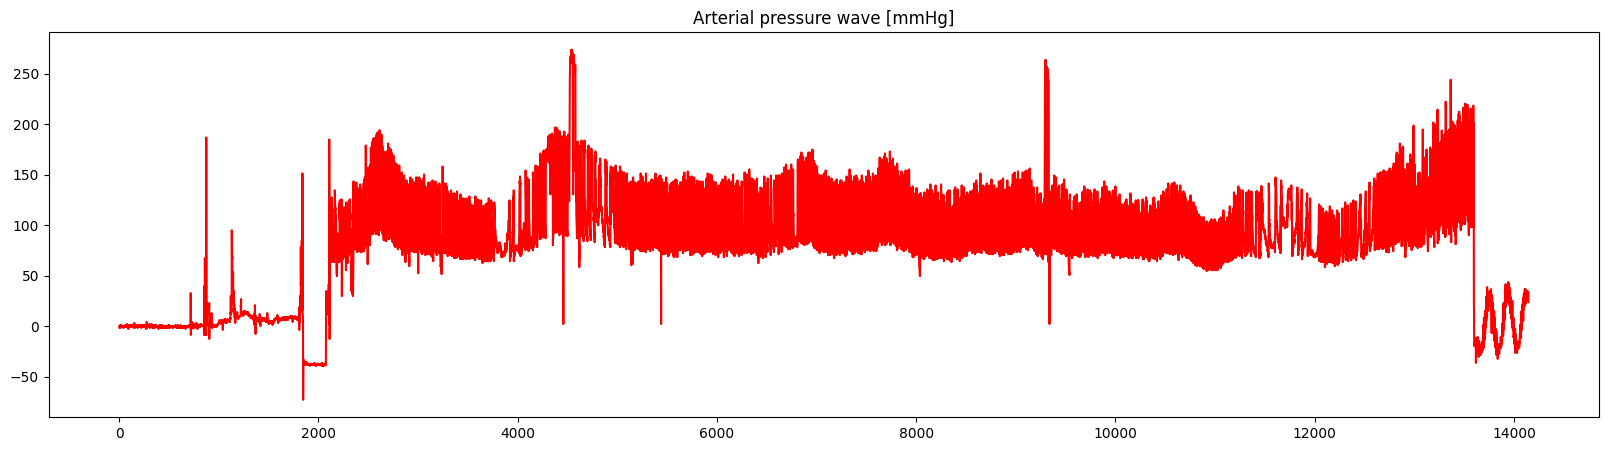

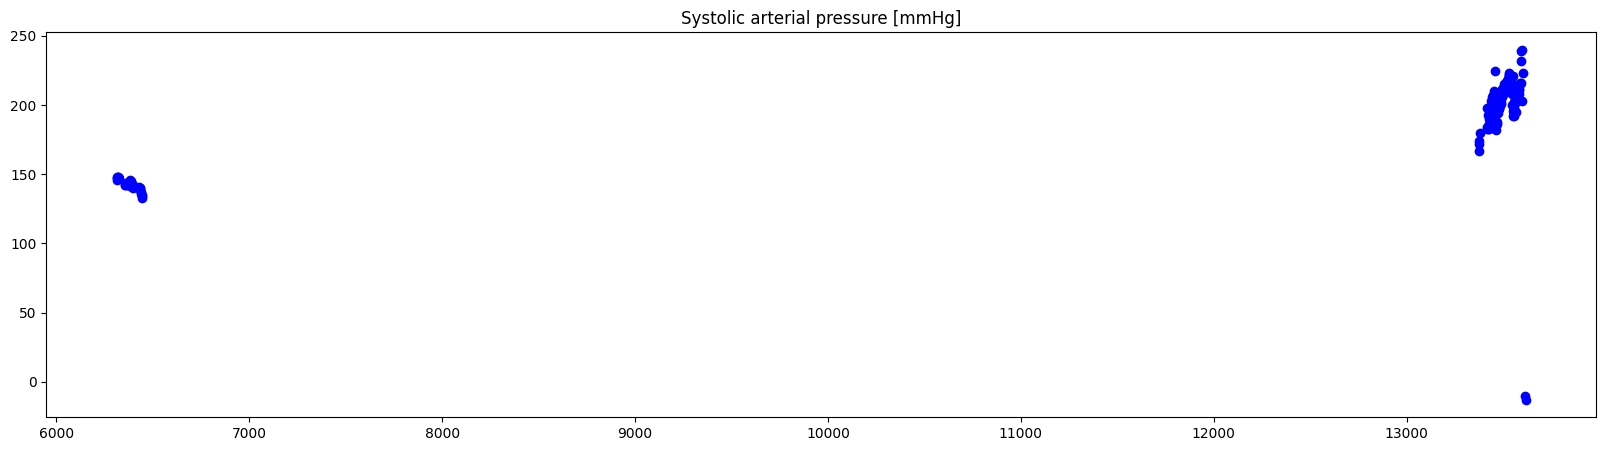

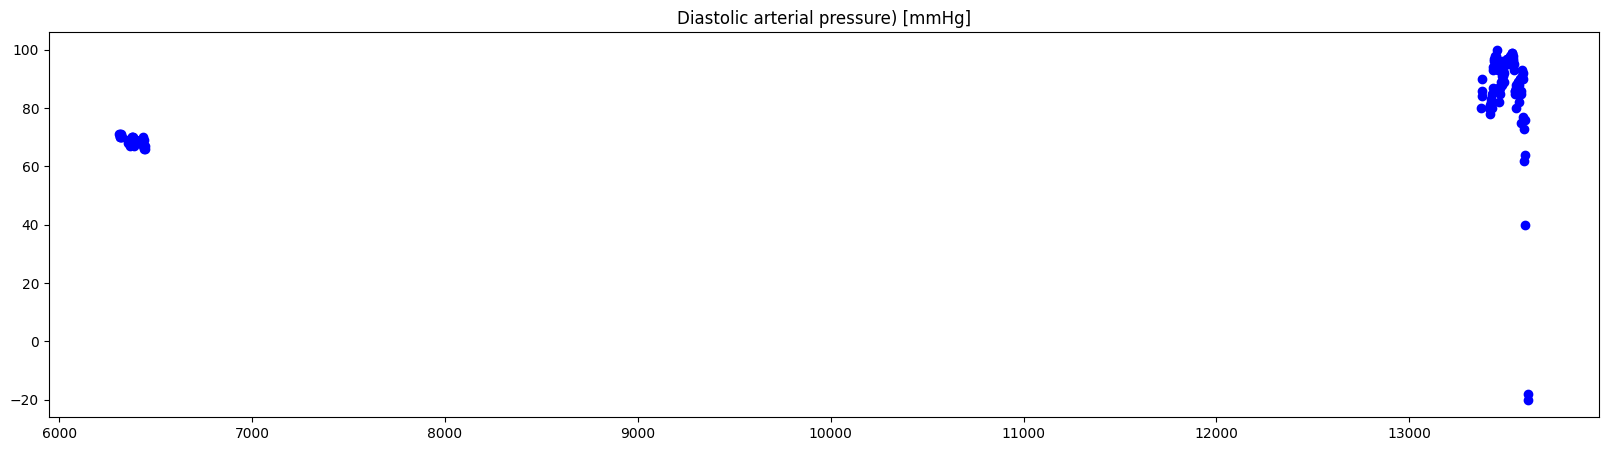

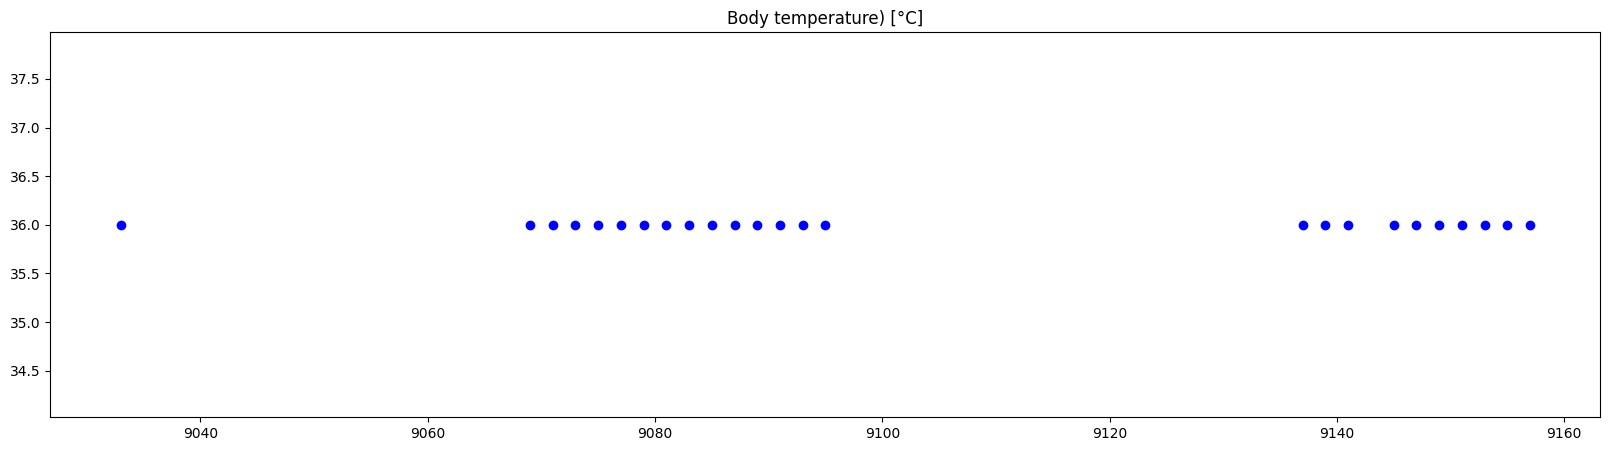

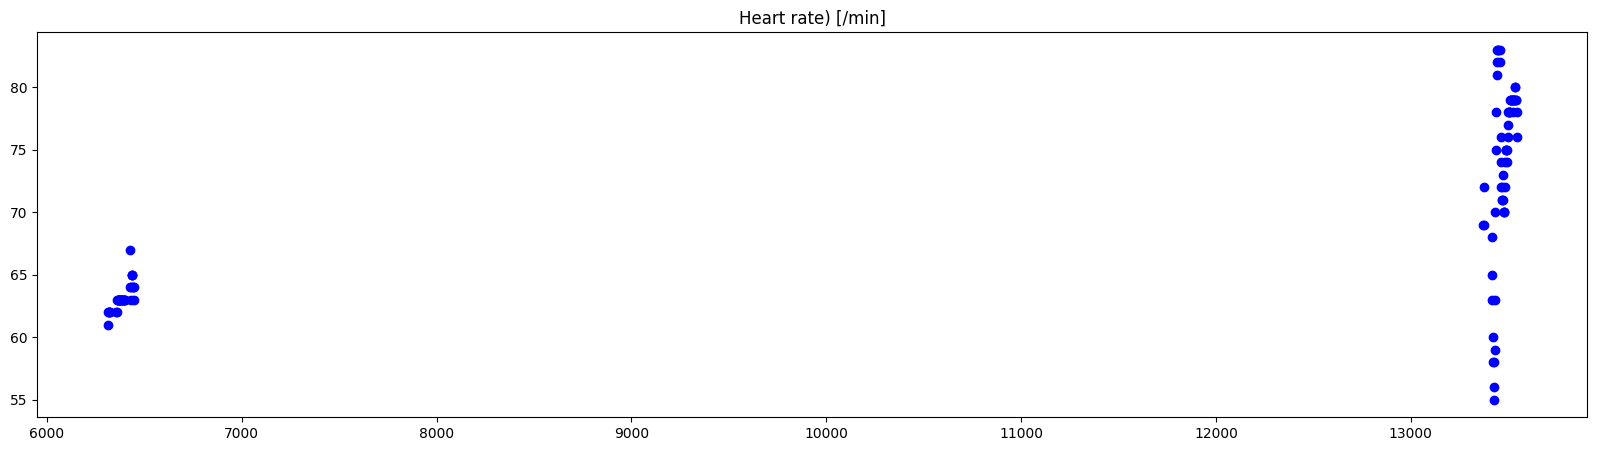

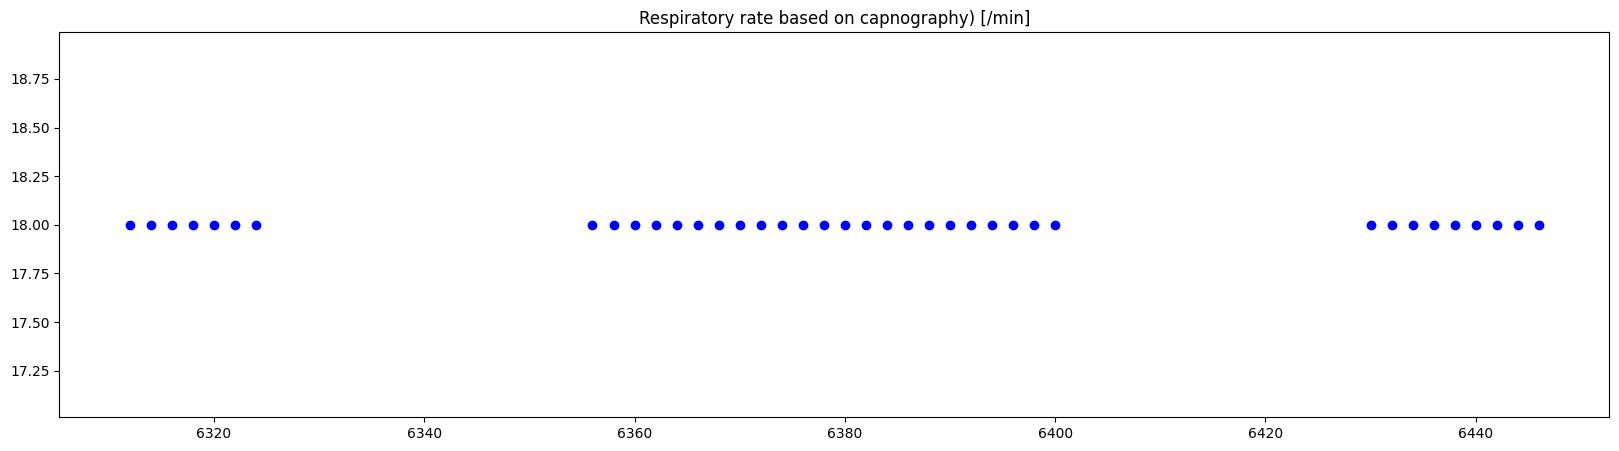

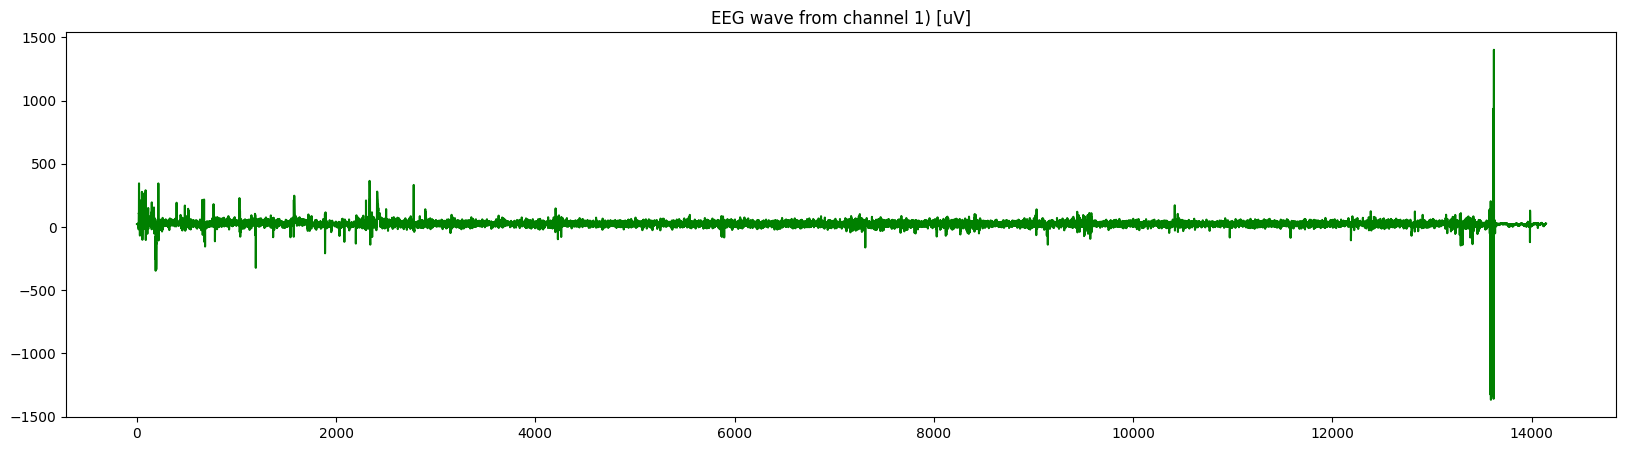

In [161]:
import mysql.connector

# Funzione per verificare l'appartenenza del medico al reparto
def verifica_medico_autorizzato(medico_id, reparto_id):
    # Connessione al database
    cnx = mysql.connector.connect(
        host="localhost",
        user="root",
        password="ciao",
        database="ospedale"
    )
    cursor = cnx.cursor()

    # Query per verificare l'appartenenza del medico al reparto
    query = f"SELECT COUNT(*) FROM Medici WHERE ID = {medico_id} AND Reparto = {reparto_id}"
    cursor.execute(query)
    result = cursor.fetchone()

    # Verifica del risultato della query
    if result and result[0] > 0:
        medico_autorizzato = True
    else:
        medico_autorizzato = False

    # Chiusura della connessione al database
    cursor.close()
    cnx.close()
    


    return medico_autorizzato


# Funzione per visualizzare l'andamento giornaliero dei parametri di un paziente
def visualizza_andamento_parametri(paziente_id):
    # Connessione al database
    cnx = mysql.connector.connect(
        host="localhost",
        user="root",
        password="ciao",
        database="ospedale"
    )
    cursor = cnx.cursor()

    # Verifica se il medico è autorizzato (ad esempio, controllando il reparto)
    medico_autorizzato = verifica_medico_autorizzato(medico_id, reparto_id)

    if medico_autorizzato:
        
        with engine.connect() as conn:          
            # Query per ottenere i parametri del paziente
            #query = "SELECT Data, `Diastolic_arterial_pressure_[mmHg]`, `Systolic_arterial_pressure_[mmHg]`, `Body_ temperature_[°C]`, `Heart_rate_[/min]`, `Respiratory_rate_based_on_capnography_[/min]` FROM esami_clinici WHERE Paziente = {} ORDER BY Data".format(paziente_id)
            result =conn.execute(text("SELECT Data, Orario, `Arterial_pressure_wave_[mmHg]`, `Diastolic_arterial_pressure_[mmHg]`, `Systolic_arterial_pressure_[mmHg]`, `Body_ temperature_[°C]`, `Heart_rate_[/min]`, `Respiratory_rate_based_on_capnography_[/min]`, `EEG_wave_from_channel_1_[uV]` FROM esami_clinici WHERE Paziente = '{}' ORDER BY Data".format(paziente_id)))
            #rows = result.fetchall()
            conn.commit()
            
        # Visualizzazione dell'andamento giornaliero dei parametri
        if result:
            print("\n\nAndamento giornaliero dei parametri:")
            print("Data\t\t\tOrario\t\tAP\tDP\tSP\tTemp\tPolso\tFR\tEEG")
            for row in result:
                data = row[0]
                orario = row[1]
                arterial_pressure = row[2]
                pressione_min = row[3]
                pressione_max = row[4]
                temperatura = row[5]
                polso = row[6]
                freq_respiratoria = row[7]
                EEG = row[8]
                print(f"{data}\t{orario}\t{arterial_pressure}\t{pressione_min}\t{pressione_max}\t{temperatura}\t{polso}\t{freq_respiratoria}\t{EEG}")
        else:
            print("Nessun dato disponibile per il paziente.")
        
        
        dict_paz = {'RSSMRA94D15H789X':1, 'PLTNXC82E23Z456Y':20, 'BVGDFA67M34L123Z':50, 'KJHRTY91P67G321W':60, 'QWERTY78N45M623R':70}

        f_sampling = 128
  
        import vitaldb
        vals = vitaldb.load_case(caseid=dict_paz[paziente_id], track_names=['SNUADC/ART','Solar8000/ART_SBP', 'Solar8000/ART_DBP', 'Solar8000/BT', 'Solar8000/HR', 'Solar8000/RR_CO2', 'BIS/EEG1_WAV'],interval=1/f_sampling)

        N_samples = len(vals)
        time = round(N_samples*(1/f_sampling),2) #secondi
        minuts = round(time/60)
        hours = round(minuts/60,2)
        
        print(f_sampling, 'campioni/s')
        print(N_samples, 'campioni')
        print(time, 's')
        print(hours, 'hours')

        durata = time
        vals = vals[::f_sampling]
        print(len(vals), 'campioni presi ogni secondo')
        
        import matplotlib.pyplot as plt

        # 'SNUADC/ART' (Arterial pressure wave) [mmHg]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 0], color='r')
        plt.title('Arterial pressure wave [mmHg]')
        plt.show()

        #'Solar8000/ART_SBP' (Systolic arterial pressure) [mmHg]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 1], 'bo')
        plt.title('Systolic arterial pressure [mmHg]')
        plt.show()

        #'Solar8000/ART_DBP' (Diastolic arterial pressure) [mmHg]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 2], 'bo')
        plt.title('Diastolic arterial pressure) [mmHg]')
        plt.show()

        # 'Solar8000/BT' (Body temperature) [°C]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 3], 'bo')
        plt.title('Body temperature) [°C]')
        plt.show()

        # 'Solar8000/HR' (Heart rate) [/min]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 4], 'bo')
        plt.title('Heart rate) [/min]')
        plt.show()

        # 'Solar8000/RR' (Respiratory rate based on capnography) [/min]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 5], 'bo')
        plt.title('Respiratory rate based on capnography) [/min]')
        plt.show()

        # 'BIS/EEG1_WAV' (EEG wave from channel 1) [uV]
        plt.figure(figsize=(20, 5))
        plt.plot(vals[:, 6], 'g-')
        plt.title('EEG wave from channel 1) [uV]')
        plt.show()
        
    else:
        print("Accesso negato. Non sei autorizzato.")

    # Chiusura della connessione al database
    cursor.close()
    cnx.close()





# Esempio di utilizzo


print("VISUALIZZAZIONE PARAMETRI VITALI PER I PAZIENTI DI TERAPIA INTENSIVA\n")

reparto_id = input('Inserire ID del reparto: ')  # Da sostituire con l'ID del reparto desiderato

if reparto_id == str(167):
    medico_id = input('Inserire ID del medico: ')  # Da sostituire con l'ID del medico
    verifica_medico_autorizzato(medico_id, reparto_id)

    if verifica_medico_autorizzato(medico_id, reparto_id):
        paziente_id = input('Inserire codice fiscale del paziente: ') # Da sostituire con l'ID del paziente desiderato
        
        # Connessione al database
        cnx = mysql.connector.connect(
        host="localhost",
        user="root",
        password="ciao",
        database="ospedale"
        )
        cursor = cnx.cursor()
        
        with engine.connect() as conn:    
            result = conn.execute(text("SELECT CodFisc FROM Pazienti "))
            conn.commit()

        # Verifica del risultato della query
        paz = []
        for row in result:
            paz.append(row[0])
        
        if paziente_id in paz:
            visualizza_andamento_parametri(paziente_id)
        else:
            print("ID del paziente non valido")
    else:
        print("ID del medico non valido")
else:
    print("ID del reparto non valido")
    
    
#Esempio
#medico_id = 12445  # Da sostituire con l'ID del medico
#paziente_id = "BVGDFA67M34L123Z" # Da sostituire con l'ID del paziente desiderato
#reparto_id = 167  # Da sostituire con l'ID del reparto desiderato

# PAZIENTI
# RSSMRA94D15H789X, PLTNXC82E23Z456Y, BVGDFA67M34L123Z, KJHRTY91P67G321W, QWERTY78N45M623R

# MEDICI
# 12445, 52314





In [164]:
!pip install nbconvert
!jupyter nbconvert --to pdf DATABASE.ipynb


You should consider upgrading via the 'C:\Users\Utente\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


[NbConvertApp] Converting notebook DATABASE.ipynb to pdf
[NbConvertApp] Support files will be in DATABASE_files\
[NbConvertApp] Making directory .\DATABASE_files
[NbConvertApp] Writing 449096 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 884272 bytes to DATABASE.pdf
